In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('hiber_train_zscore.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:3]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('hiber_test_zscore.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:3]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2
 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2]
[[-2.08583698  0.39809964 -0.40449359]
 [-2.08583698 -0.22512344 -0.10050301]
 [-1.99222458 -1.15995804 -0.2524983 ]
 [-1.99222458  0.70971117  0.05149228]
 [-1.80499979 -1.47156958  0.96346402]
 [-1.80499979 -0.84834651 -0.55648888]
 [-1.7113874  -1.15995804 -0.55648888]
 [-1.7113874   1.02132271  0.81146873]
 [-1.7113874  -1.47156958  4.00336981]
 [-1.7113874  -0.84834651 -0.40449359]
 [-1.7113874  -0.53673497  0.96346402]
 [-1.7113874   1.33293424  0.50747815]
 [-1.7113874  -0.84834651 -0.55648

In [2]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1,save_name):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')

    plt.legend(fontsize='small',labels=[ '1','2'])  
    plt.savefig(save_name)
    plt.show()

**********************GaussianNB**********************
Training time cost 0.03996920585632324 s
Test time cost 0.0009210109710693359 s
GaussianNB accuracy= 0.7540983606557377


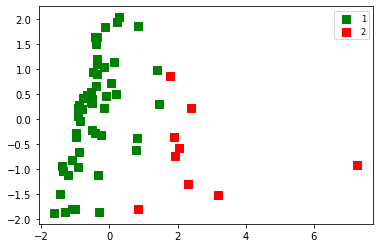

In [3]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import time
from sklearn import  decomposition
#高斯贝叶斯分类器
print('**********************GaussianNB**********************')
time_start = time.time()
# 创建分类器对象
clf = GaussianNB()
#用训练数据拟合分类器模型
clf = clf.fit(train_features.astype(np.float64), train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')

time_start = time.time()
#用训练好的分类器去预测test_features数据的标签类
label_predict = clf.predict(test_features.astype(np.float64))
time_end = time.time()
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
print('Test time cost',time_end-time_start,'s')
print('GaussianNB accuracy=', accuracy)

#提取主成分进行分析画图
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit( X_pca[label_predict == 1],X_pca[label_predict == 2],"GaussianNB-matplotlib-zscore.png")